In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
'''
Differential  equation is u''(x) + sin(x) = 0
Boundary conditions are u(0)=u(1)=0
'''

# Let the initial and final points be i and f 

i= 0
f = 1

# State boundary conditions

u_i=0
u_f=0

# Number of elements IN BETWEEN
n= 10

# Element size 
h= (f-i)/(n+1)

# x
x= np.linspace(i,f,n+2)

In [120]:
'''
Need to find solution such that KU=F
where U is the solution we want
Let F= Sf
'''

## Make K matrix   =| 2 -1  0  0  ...  0 |
        ##          |-1  2 -1  0  ...  0 |
        ##          | 0 -1  2  .  ...  0 | * 1/h
        ##          | .        .   .   . |
        ##          | 0  ...   ... -1  2 |
    

K = 2*np.identity(n)

k1 = -1*np.identity(n-1)

k1=np.c_[np.zeros(n-1), k1] #adds a collumn of zeros at the beginning
k1=np.r_[k1,[np.zeros(n)]]  #adds a rows of zeros at the end

#print(k1)

k2= k1.transpose()

K= K+ k1 + k2

K = K/h
#print(K)


In [121]:
## Make S matrix 

S = (2*h/3)*np.identity(n)
s1 = (1*h/6)*np.identity(n-1)

s1=np.c_[np.zeros(n-1), s1] #adds a collumn of zeros at the beginning
s1=np.r_[s1,[np.zeros(n)]]  #adds a rows of zeros at the end

#print(s1)

s2= s1.transpose()

S= S+ s1 + s2

#print(S)

In [122]:
## Make f vector

f = np.sin(x[1:-1])

## Find F= Sf

F= np.matmul(S,f)
F[0]= F[0]+ (u_i/h)
F[-1]= F[-1]+ (u_f/h)

#print(F)

In [123]:
###Solving for U= K^(-1)S

U= np.matmul(np.linalg.inv(K),F)
U = np.insert(U,[0,n],[u_i,u_f]) #to ensure x and U have same dimension

#print(U)

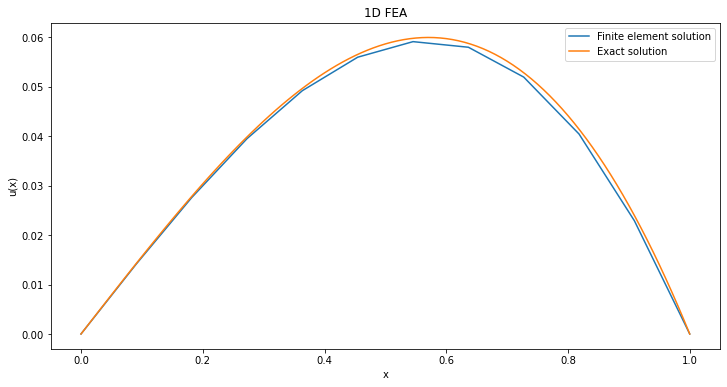

In [124]:
####Plot U
plt.figure(figsize=[12,6])
plt.plot(x,U, label='Finite element solution')

####Plot exact solution
x2=np.linspace(0,1,101)
plt.plot(x2,np.sin(x2)-(np.sin(1)*x2), label='Exact solution')


##### Annotate the plots
plt.title('1D FEA')
plt.xlabel('x')
plt.ylabel('u(x)')

plt.legend()

plt.show()